

# Setup

If the program is too slow reduce the number of iteration in RandomizedSearchCV, line 26 code cell number 7

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Training and visualizing

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd

file_name = "df_vector.pkl"
wiki = pd.read_pickle(file_name)

In [ ]:
X = (np.stack(wiki.FeatureVector.to_numpy())).copy()
y = wiki.Theme.copy()


In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

In [ ]:
plot_tree(tree_clf);

# Predicting classes and class probabilities

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred_tree = tree_clf.predict(X)
y_pred_cross = cross_val_predict(tree_clf, X, y, cv=10)


Accuracy_score = accuracy_score(y, y_pred_tree)
Precision_score = precision_score(y, y_pred_tree, average='micro')
Recall_score = recall_score(y, y_pred_tree, average='micro')
F1_score = f1_score(y, y_pred_tree, average='micro')

Accuracy_score_cross = accuracy_score(y, y_pred_cross)
Precision_score_cross = precision_score(y, y_pred_cross, average='micro')
Recall_score_cross = recall_score(y, y_pred_cross, average='micro')
F1_score_cross = f1_score(y, y_pred_cross, average='micro')


print("Accuracy_score = ",Accuracy_score)
print("Precision_score = ",Precision_score)
print("Recall_score = ",Recall_score)
print("F1_score = ",F1_score)
print("------------------------------------")
print("Accuracy_score_cross = ",Accuracy_score_cross)
print("Precision_score_cross = ",Precision_score_cross)
print("Recall_score_cross = ",Recall_score_cross)
print("F1_score_cross = ",F1_score_cross)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [4,10,50,100,None]
min_samples_split = [2,5,20,40,80]
min_samples_leaf = [1,2,4,8,16]
criterion = ["gini","entropy","log_loss"]
splitter = ["best","random"]
max_features = [10,"sqrt","log2",None]
random_state = [10,20,60,None]
max_leaf_nodes = [2,5,10,30,None]
ccp_alpha = [0.0,0.5,1.0,2.0]

random_grid = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'criterion':criterion,
                'splitter':splitter,
                'max_features':max_features,
                'random_state':random_state,
                'max_leaf_nodes':max_leaf_nodes,
                'ccp_alpha':ccp_alpha,
}


model_tuned = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions = random_grid, n_iter = 1000, scoring='accuracy', cv = 10, return_train_score= True, refit=True)

model_tuned.fit(X,y)

In [ ]:
print("-----------------------------------------------------------------------------")
print("-Comparison of the efficiency of the different parameters ranked by accuracy-")
print("-----------------------------------------------------------------------------")
df_results = pd.DataFrame(model_tuned.cv_results_)
print(df_results)

In [ ]:
print("-----------------------")
print("------Best score-------")
print("-----------------------")
print(model_tuned.best_score_)

In [ ]:
print("-----------------------")
print("------Best params------")
print("-----------------------")
print(model_tuned.best_params_)

In [ ]:
best_tree_clf = model_tuned.best_estimator_
plot_tree(best_tree_clf)

We can see that the main change between our first tree and this optimise tree is max_depth, our previous tree had a depth of only 2 restraining the tree from gaining more complexity allowing it to be more accurate. Here we have a depth of 100. A high min number of samples split also helps gain accuracy.

In [ ]:
from sklearn.model_selection import train_test_split


split1 = 0.3
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=split1)

split2 = split1 + 0.7 * 0.3

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=split2)

split3 = split1 + 0.7 * 0.6
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=split3)

best_tree_clf.fit(X_train1, y_train1)
y_pred_tree_train1 = best_tree_clf.predict(X_train1)
y_pred_tree_test1 = best_tree_clf.predict(X_test1)

best_tree_clf.fit(X_train2, y_train2)
y_pred_tree_train2 = best_tree_clf.predict(X_train2)
y_pred_tree_test2 = best_tree_clf.predict(X_test2)

best_tree_clf.fit(X_train3, y_train3)
y_pred_tree_train3 = best_tree_clf.predict(X_train3)
y_pred_tree_test3 = best_tree_clf.predict(X_test3)


Accuracy_score_train1 = accuracy_score(y_train1, y_pred_tree_train1)
Accuracy_score_test1 = accuracy_score(y_test1, y_pred_tree_test1)

Accuracy_score_train2 = accuracy_score(y_train2, y_pred_tree_train2)
Accuracy_score_test2 = accuracy_score(y_test2, y_pred_tree_test2)

Accuracy_score_train3 = accuracy_score(y_train3, y_pred_tree_train3)
Accuracy_score_test3 = accuracy_score(y_test3, y_pred_tree_test3)

print(y_pred_tree_train1)
print(y_train1)

print("-----------------")
print("------Test 1-----")
print("-----------------")
print("Accuracy on train set: ",Accuracy_score_train1)
print("Accuracy on test set: ",Accuracy_score_test1)
print("-----------------")
print("------Test 3-----")
print("-----------------")
print("Accuracy on train set: ",Accuracy_score_train2)
print("Accuracy on test set: ",Accuracy_score_test2)
print("-----------------")
print("------Test 3-----")
print("-----------------")
print("Accuracy on train set: ",Accuracy_score_train3)
print("Accuracy on test set: ",Accuracy_score_test3)


While moving 30% of our training set to our test set has a light positive impact on test set accuracy which is the most important. There is a drop in training and in testing accuracy when we move 60% of our training set to our test set because of over-fitting problems. Using a tree classifier on our data-set doesn't give us great accuracy making the analysis of the over-fitting effect more difficult.

[Text(0.8790650406504065, 0.9864864864864865, 'X[583] <= 0.001\ngini = 0.882\nsamples = 994\nvalue = [45, 57, 105, 41, 83, 45, 111, 55, 208, 146, 98]'),
 Text(0.790650406504065, 0.9594594594594594, 'X[148] <= 0.001\ngini = 0.877\nsamples = 935\nvalue = [45, 57, 49, 41, 81, 45, 111, 55, 208, 145, 98]'),
 Text(0.7113821138211383, 0.9324324324324325, 'X[39] <= 0.002\ngini = 0.866\nsamples = 778\nvalue = [39, 51, 45, 40, 71, 43, 18, 51, 191, 138, 91]'),
 Text(0.6504065040650406, 0.9054054054054054, 'X[229] <= 0.004\ngini = 0.881\nsamples = 669\nvalue = [39, 51, 33, 40, 69, 42, 18, 51, 110, 136, 80]'),
 Text(0.6097560975609756, 0.8783783783783784, 'X[152] <= 0.004\ngini = 0.873\nsamples = 622\nvalue = [39, 51, 33, 40, 65, 9, 17, 50, 107, 134, 77]'),
 Text(0.5772357723577236, 0.8513513513513513, 'X[82] <= 0.006\ngini = 0.864\nsamples = 575\nvalue = [39, 48, 33, 10, 62, 9, 17, 50, 97, 134, 76]'),
 Text(0.5609756097560976, 0.8243243243243243, 'X[570] <= 0.002\ngini = 0.865\nsamples = 537\nvalu

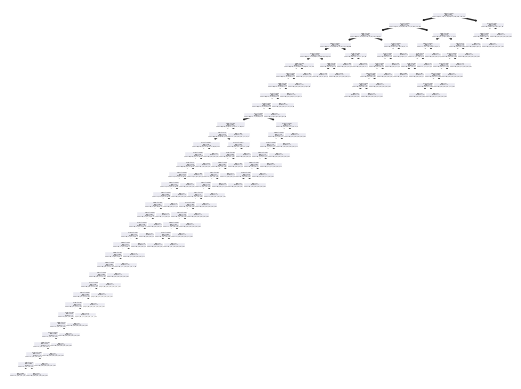

In [68]:
best_tree_clf = model_tuned.best_estimator_
plot_tree(best_tree_clf)

We can see that the main change between our first tree and this optimise tree is max_depth, our previous tree had a depth of only 2 restraining the tree from gaining more complexity allowing it to be more accurate. Here we have a depth of 100. A high min number of samples split also helps gain accuracy.

In [69]:
from sklearn.model_selection import train_test_split


split1 = 0.3
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=split1)

split2 = split1 + 0.7 * 0.3

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=split2)

split3 = split1 + 0.7 * 0.6
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=split3)

best_tree_clf.fit(X_train1, y_train1)
y_pred_tree_train1 = best_tree_clf.predict(X_train1)
y_pred_tree_test1 = best_tree_clf.predict(X_test1)

best_tree_clf.fit(X_train2, y_train2)
y_pred_tree_train2 = best_tree_clf.predict(X_train2)
y_pred_tree_test2 = best_tree_clf.predict(X_test2)

best_tree_clf.fit(X_train3, y_train3)
y_pred_tree_train3 = best_tree_clf.predict(X_train3)
y_pred_tree_test3 = best_tree_clf.predict(X_test3)


Accuracy_score_train1 = accuracy_score(y_train1, y_pred_tree_train1)
Accuracy_score_test1 = accuracy_score(y_test1, y_pred_tree_test1)

Accuracy_score_train2 = accuracy_score(y_train2, y_pred_tree_train2)
Accuracy_score_test2 = accuracy_score(y_test2, y_pred_tree_test2)

Accuracy_score_train3 = accuracy_score(y_train3, y_pred_tree_train3)
Accuracy_score_test3 = accuracy_score(y_test3, y_pred_tree_test3)

print(y_pred_tree_train1)
print(y_train1)

print("-----------------")
print("------Test 1-----")
print("-----------------")
print("Accuracy on train set: ",Accuracy_score_train1)
print("Accuracy on test set: ",Accuracy_score_test1)
print("-----------------")
print("------Test 3-----")
print("-----------------")
print("Accuracy on train set: ",Accuracy_score_train2)
print("Accuracy on test set: ",Accuracy_score_test2)
print("-----------------")
print("------Test 3-----")
print("-----------------")
print("Accuracy on train set: ",Accuracy_score_train3)
print("Accuracy on test set: ",Accuracy_score_test3)


['Science' 'Arts' 'Science' 'Everyday life' 'Technology' 'Science'
 'Technology' 'Society and social sciences' 'Geography' 'Everyday life'
 'Science' 'Science' 'Technology' 'Geography' 'Mathematics'
 'Philosophy and religion' 'History' 'Science'
 'Society and social sciences' 'Geography' 'Mathematics' 'Science'
 'Technology' 'Science' 'Society and social sciences' 'History' 'People'
 'People' 'Society and social sciences' 'Geography' 'People' 'Science'
 'Health, medicine and disease' 'Society and social sciences'
 'Mathematics' 'Geography' 'Mathematics' 'Science' 'Everyday life'
 'Society and social sciences' 'Mathematics' 'History'
 'Society and social sciences' 'Technology' 'Geography' 'Arts' 'Arts'
 'Society and social sciences' 'Philosophy and religion'
 'Society and social sciences' 'Science' 'History'
 'Society and social sciences' 'Geography' 'Science' 'Geography' 'Science'
 'Geography' 'History' 'Philosophy and religion'
 'Health, medicine and disease' 'Geography' 'History' 'Hi

While moving 30% of our training set to our test set has a light positive impact on test set accuracy which is the most important. There is a drop in training and in testing accuracy when we move 60% of our training set to our test set because of over-fitting problems. Using a tree classifier on our data-set doesn't give us great accuracy making the analysis of the over-fitting effect more difficult.